# Implementation

## Code repo
https://github.com/KimDinh/CPSC-532W-2021W1/tree/master/a6

## Code added in evaluator.py
```python
if op == 'sample':
    ...
    sigma = {'type' : 'sample',
            'alpha': alpha
            }
elif op == 'observe':
    ...
    sigma = {'type': 'observe',
            'alpha': alpha,
            'logW': d.log_prob(c)
            }
```

## Code added in smc.py
```python
def resample_particles(particles, log_weights):
    n_particles = len(particles)
    weights = np.exp(np.array(log_weights))
    resampled_idx = np.random.choice(range(n_particles), n_particles, p=weights/np.sum(weights))
    new_particles = [particles[i] for i in resampled_idx]
    logZ = np.log(np.sum(weights) / n_particles)
    
    return logZ, new_particles

# check particle addresses, and get weights and continuations
particles[i] = res
sigma = res[2]
weights[i] = sigma['logW'].detach()

if i == 0:
    alpha_cur = sigma['alpha']
else:
    assert(alpha_cur == sigma['alpha'])
```

#

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import time
import json
from smc import SMC

def load_exp(num):
    with open('programs/{}.json'.format(num),'r') as f:
        exp = json.load(f)
    return exp

# Program 1

In [2]:
def smc_program1(n_particles):
    exp = load_exp(1)
    start = time.time()
    logZ, particles = SMC(n_particles, exp)
    end = time.time()
    values = torch.stack(particles).detach().numpy()

    print("Number of samples: {}".format(n_particles))
    print("Sampling time: {} seconds".format(int(end-start)))
    print("Posterior mean: {:.3f}".format(np.mean(values)))
    print("Posterior variance: {:.3f}".format(np.var(values)))
    print("logZ: {:.3f}\nZ: {}".format(logZ, np.exp(logZ)))

    plt.figure(figsize=(10,5))
    plt.hist(values, bins=50)
    plt.savefig("figs/p1_{}_particles.png".format(n_particles))

## \#particle: 1

Number of samples: 1
Sampling time: 0 seconds
Posterior mean: 23.000
Posterior variance: 0.000
logZ: 0.000
Z: 1.0


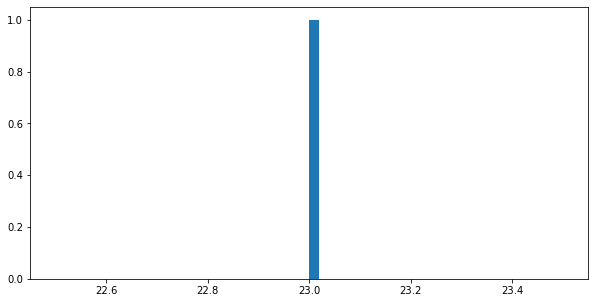

In [3]:
smc_program1(n_particles=1)

## \#particle: 10

Number of samples: 10
Sampling time: 0 seconds
Posterior mean: 63.400
Posterior variance: 5308.840
logZ: 0.000
Z: 1.0


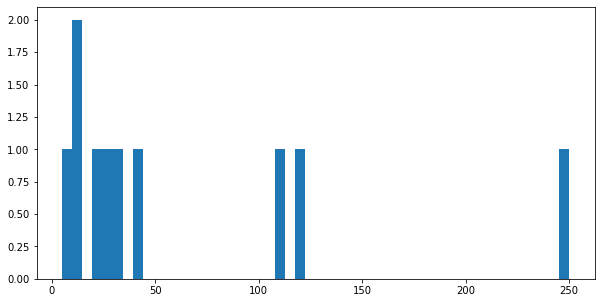

In [4]:
smc_program1(n_particles=10)

## \#particle: 100

Number of samples: 100
Sampling time: 1 seconds
Posterior mean: 110.780
Posterior variance: 14171.592
logZ: 0.000
Z: 1.0


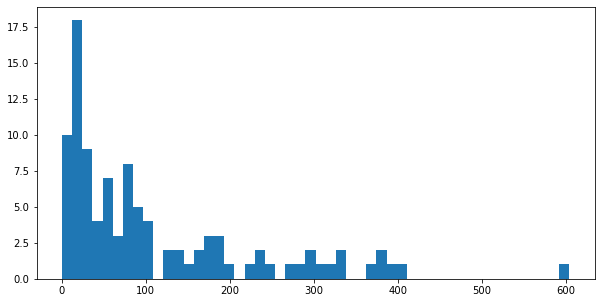

In [5]:
smc_program1(n_particles=100)

## \#particle: 1000

Number of samples: 1000
Sampling time: 11 seconds
Posterior mean: 93.592
Posterior variance: 8760.470
logZ: 0.000
Z: 1.0


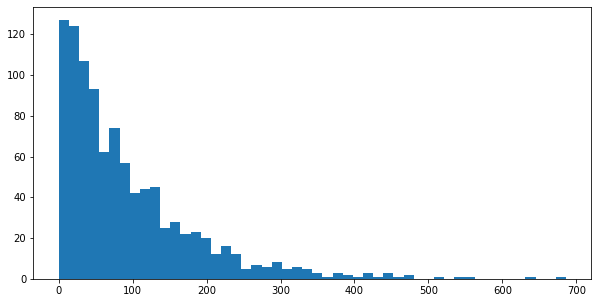

In [6]:
smc_program1(n_particles=1000)

## \#particle: 10000

Number of samples: 10000
Sampling time: 121 seconds
Posterior mean: 101.895
Posterior variance: 10722.793
logZ: 0.000
Z: 1.0


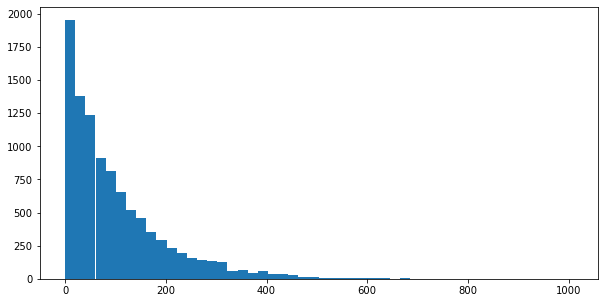

In [7]:
smc_program1(n_particles=int(1e4))

## \#particle: 100000

Number of samples: 100000
Sampling time: 1204 seconds
Posterior mean: 99.288
Posterior variance: 9953.263
logZ: 0.000
Z: 1.0


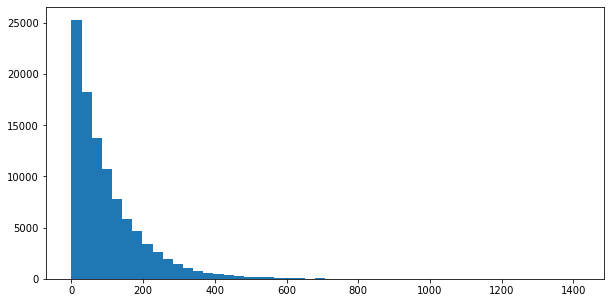

In [8]:
smc_program1(n_particles=int(1e5))

# Program 2

In [2]:
def smc_program2(n_particles):
    exp = load_exp(2)
    start = time.time()
    logZ, particles = SMC(n_particles, exp)
    end = time.time()
    values = torch.stack(particles).detach().numpy()

    print("Number of samples: {}".format(n_particles))
    print("Sampling time: {} seconds".format(int(end-start)))
    print("Posterior mean: {:.3f}".format(np.mean(values)))
    print("Posterior variance: {:.3f}".format(np.var(values)))
    print("logZ: {:.3f}\nZ: {}".format(logZ, np.exp(logZ)))

    plt.figure(figsize=(10,5))
    plt.hist(values, bins=50)
    plt.savefig("figs/p2_{}_particles.png".format(n_particles))

## \#particle: 1

Number of samples: 1
Sampling time: 0 seconds
Posterior mean: -4.303
Posterior variance: 0.000
logZ: -84.616
Z: 1.7853405871579215e-37


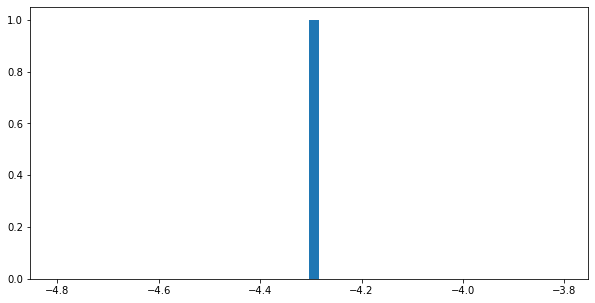

In [3]:
smc_program2(n_particles=1)

## \#particle: 10

Number of samples: 10
Sampling time: 0 seconds
Posterior mean: 4.205
Posterior variance: 0.013
logZ: -13.707
Z: 1.114102977241963e-06


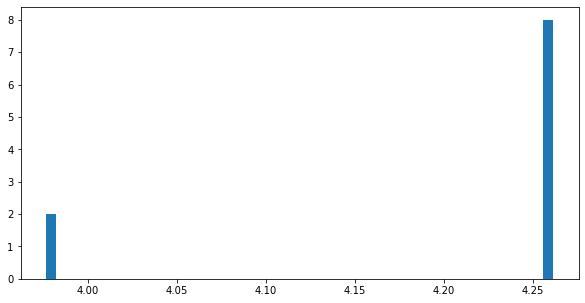

In [4]:
smc_program2(n_particles=10)

## \#particle: 100

Number of samples: 100
Sampling time: 0 seconds
Posterior mean: 4.973
Posterior variance: 0.038
logZ: -11.895
Z: 6.824851181640844e-06


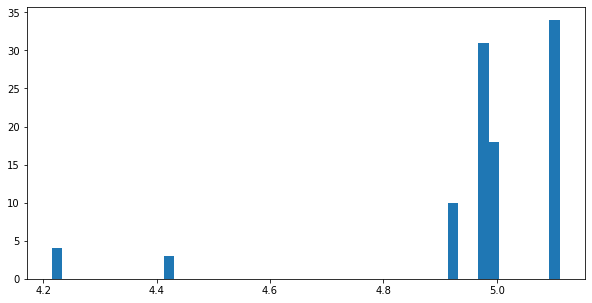

In [5]:
smc_program2(n_particles=100)

## \#particle: 1000

Number of samples: 1000
Sampling time: 1 seconds
Posterior mean: 7.193
Posterior variance: 0.495
logZ: -8.124
Z: 0.0002962635900651842


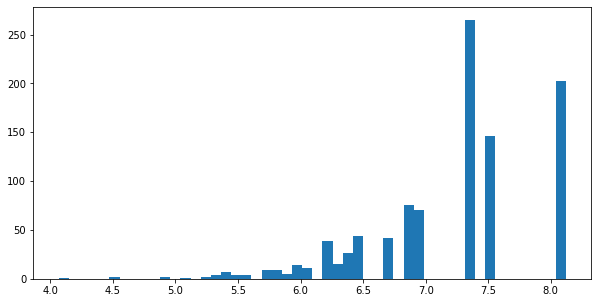

In [6]:
smc_program2(n_particles=1000)

## \#particle: 10000

Number of samples: 10000
Sampling time: 13 seconds
Posterior mean: 7.217
Posterior variance: 0.633
logZ: -8.096
Z: 0.00030477147831755723


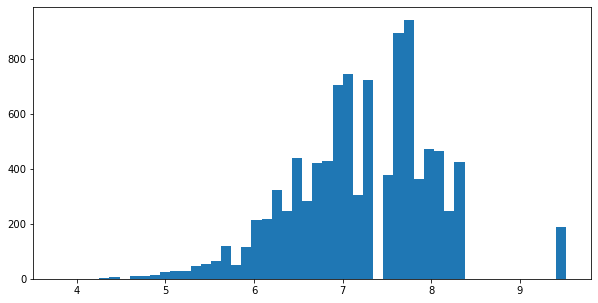

In [7]:
smc_program2(n_particles=int(1e4))

## \#particle: 100000

Number of samples: 100000
Sampling time: 132 seconds
Posterior mean: 7.265
Posterior variance: 0.872
logZ: -8.249
Z: 0.0002614232748531864


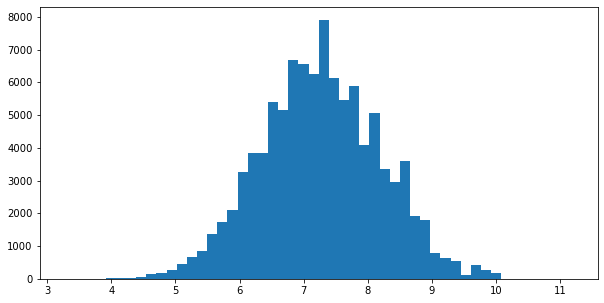

In [9]:
smc_program2(n_particles=int(1e5))

# Program 3

In [16]:
def smc_program3(n_particles):
    exp = load_exp(3)
    start = time.time()
    logZ, particles = SMC(n_particles, exp)
    end = time.time()
    values = torch.stack(particles).detach().numpy()

    print("Number of samples: {}".format(n_particles))
    print("Sampling time: {} seconds".format(int(end-start)))
    np.set_printoptions(threshold=np.inf, formatter={'float_kind': "{:.4f}".format})
    print("Posterior mean of each dim:\n", np.mean(values, axis=0, keepdims=False))
    print("Posterior variance of each dim:\n", np.var(values, axis=0, keepdims=False))
    print("logZ: {:.3f}\nZ: {}".format(logZ, np.exp(logZ)))

    plt.figure(figsize=(15, 8))
    for i in range(17):
        plt.subplot(3, 6, i+1)
        plt.hist(values[:, i])
        plt.title("z_{}".format(i))
    plt.tight_layout()
    plt.savefig("figs/p3_{}_particles.png".format(n_particles))

## \#particle: 1

Number of samples: 1
Sampling time: 0 seconds
Posterior mean of each dim:
 [2.0000 2.0000 2.0000 2.0000 2.0000 1.0000 2.0000 2.0000 0.0000 2.0000
 2.0000 1.0000 2.0000 1.0000 2.0000 2.0000 0.0000]
Posterior variance of each dim:
 [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
logZ: -50.128
Z: 1.6969633658522432e-22


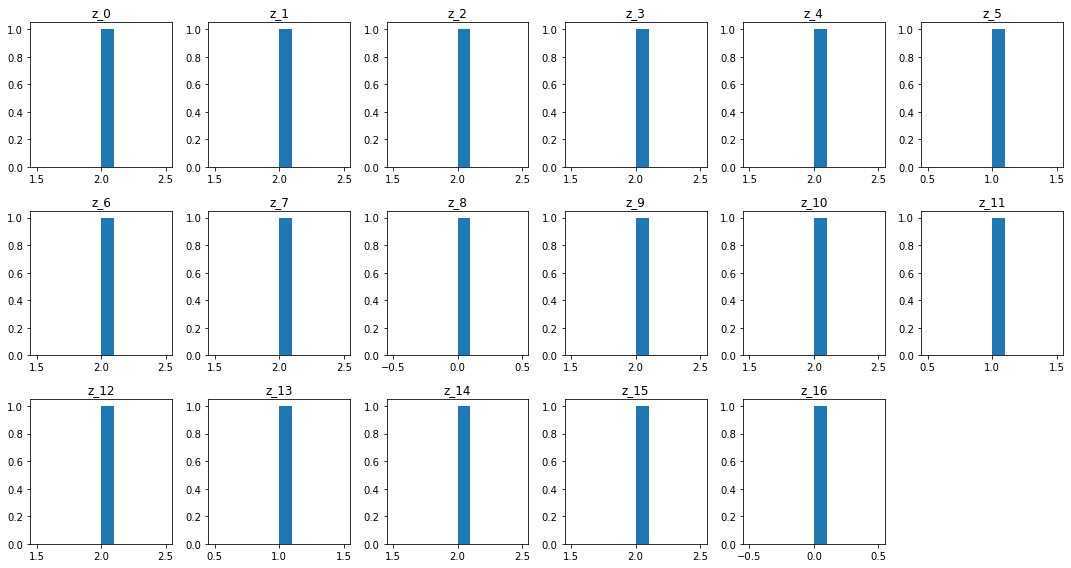

In [17]:
smc_program3(n_particles=1)

## \#particle: 10

Number of samples: 10
Sampling time: 0 seconds
Posterior mean of each dim:
 [1.6000 2.0000 2.0000 0.0000 1.0000 0.0000 1.0000 1.0000 0.0000 2.0000
 0.0000 2.0000 2.0000 1.0000 2.0000 1.0000 2.0000]
Posterior variance of each dim:
 [0.6400 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
logZ: -43.626
Z: 1.1311795279400005e-19


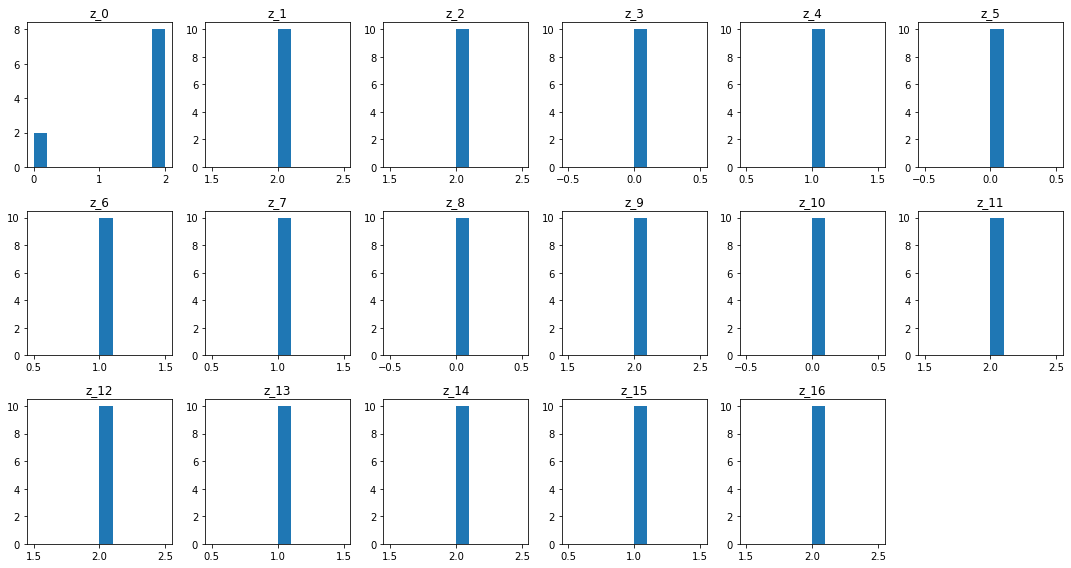

In [18]:
smc_program3(n_particles=10)

## \#particle: 100

Number of samples: 100
Sampling time: 1 seconds
Posterior mean of each dim:
 [1.3200 1.6100 1.7800 1.5900 1.0000 1.9200 1.4400 1.8600 1.6400 0.6400
 0.0000 1.9600 1.9300 1.4800 2.0000 2.0000 1.9300]
Posterior variance of each dim:
 [0.8776 0.6179 0.2516 0.5819 0.0000 0.0736 0.4264 0.1804 0.2304 0.8704
 0.0000 0.0784 0.0651 0.2496 0.0000 0.0000 0.0651]
logZ: -44.643
Z: 4.092492981539465e-20


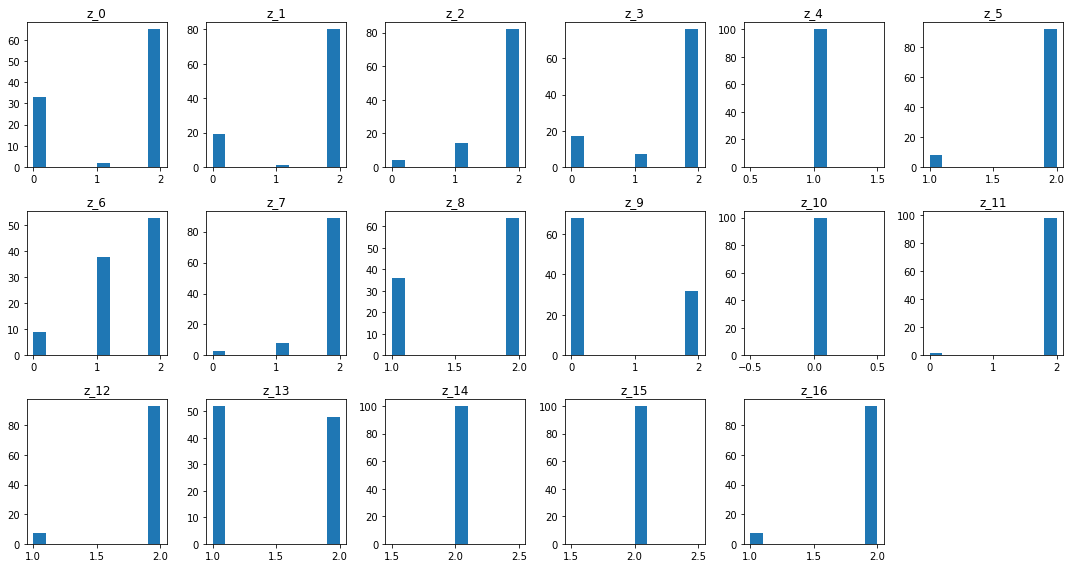

In [19]:
smc_program3(n_particles=100)

## \#particle: 1000

Number of samples: 1000
Sampling time: 11 seconds
Posterior mean of each dim:
 [1.3580 1.5770 1.6920 1.5870 1.0160 1.3390 1.5860 1.6670 1.5690 0.9860
 0.0640 1.8520 1.8280 1.6660 1.4350 1.5810 0.9830]
Posterior variance of each dim:
 [0.8018 0.6321 0.3171 0.5004 0.0157 0.6401 0.4286 0.4261 0.4752 0.8918
 0.1239 0.1301 0.2524 0.3324 0.5618 0.3154 0.7087]
logZ: -44.546
Z: 4.509160693577896e-20


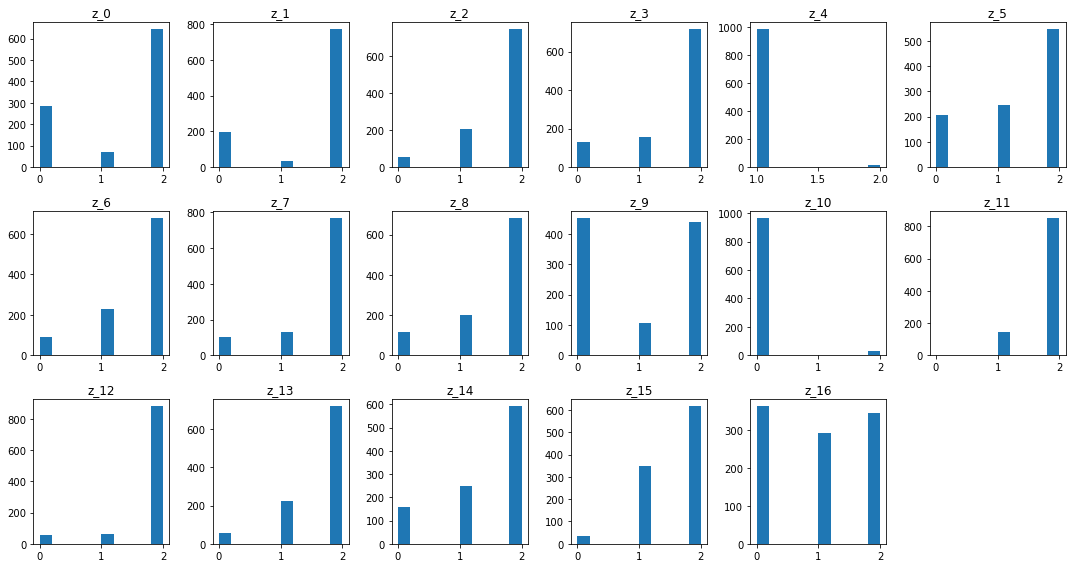

In [20]:
smc_program3(n_particles=1000)

## \#particle: 10000

Number of samples: 10000
Sampling time: 134 seconds
Posterior mean of each dim:
 [1.4190 1.5485 1.7099 1.6071 1.0163 1.4434 1.6527 1.6216 1.5883 1.0588
 0.1024 1.6646 1.6496 1.6650 1.6200 1.5376 0.9747]
Posterior variance of each dim:
 [0.7662 0.6552 0.3091 0.4481 0.0160 0.5786 0.4133 0.4658 0.4118 0.9551
 0.1943 0.3873 0.4424 0.3348 0.3352 0.3394 0.6771]
logZ: -44.419
Z: 5.1185274531511517e-20


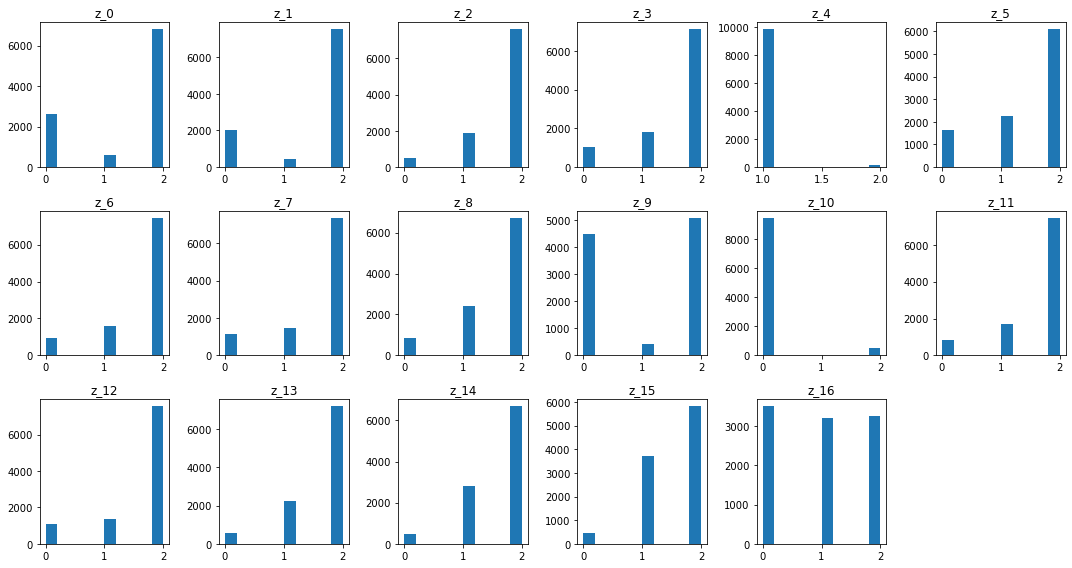

In [21]:
smc_program3(n_particles=int(1e4))

## \#particle: 100000

Number of samples: 100000
Sampling time: 2071 seconds
Posterior mean of each dim:
 [1.4270 1.5428 1.7041 1.6115 1.0151 1.4266 1.6300 1.6706 1.5966 1.0192
 0.1304 1.6706 1.6463 1.6765 1.6323 1.5015 0.9189]
Posterior variance of each dim:
 [0.7568 0.6578 0.3225 0.4597 0.0148 0.5956 0.4433 0.4178 0.4284 0.9512
 0.2438 0.3592 0.4553 0.3118 0.3387 0.3412 0.6779]
logZ: -44.434
Z: 5.039731175371268e-20


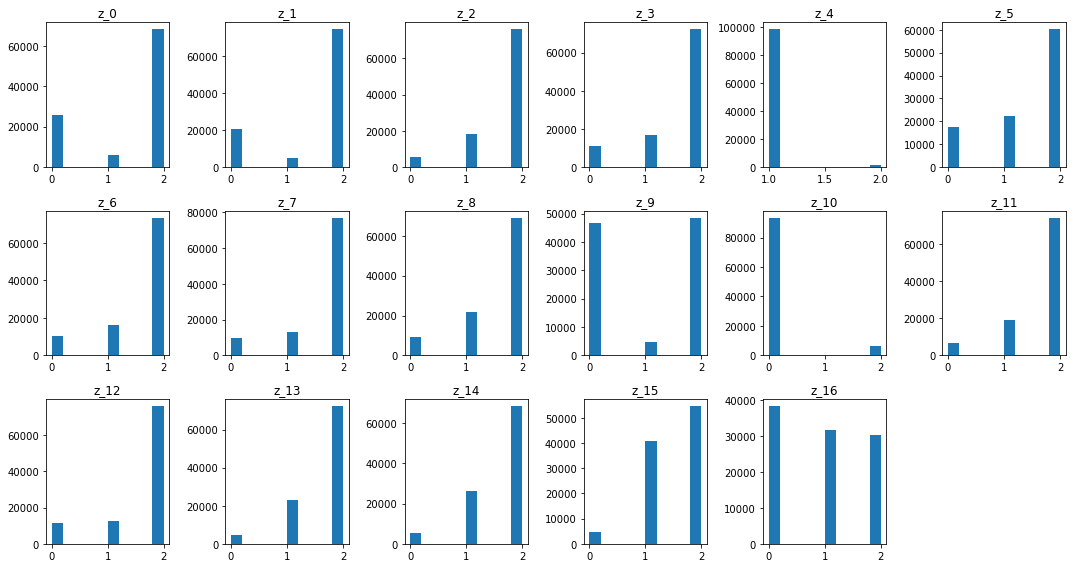

In [22]:
smc_program3(n_particles=int(1e5))

# Program 4

In [23]:
def smc_program4(n_particles):
    exp = load_exp(4)
    start = time.time()
    logZ, particles = SMC(n_particles, exp)
    end = time.time()
    values = torch.stack(particles).detach().numpy()

    print("Number of samples: {}".format(n_particles))
    print("Sampling time: {} seconds".format(int(end-start)))
    print("Posterior mean: {:.3f}".format(np.mean(values)))
    print("Posterior variance: {:.3f}".format(np.var(values)))
    print("logZ: {:.3f}\nZ: {}".format(logZ, np.exp(logZ)))

    plt.figure(figsize=(10,5))
    plt.hist(values, bins=50)
    plt.savefig("figs/p4_{}_particles.png".format(n_particles))

## \#particle: 1

Number of samples: 1
Sampling time: 0 seconds
Posterior mean: 0.260
Posterior variance: 0.000
logZ: -36.608
Z: 1.2630815026029552e-16


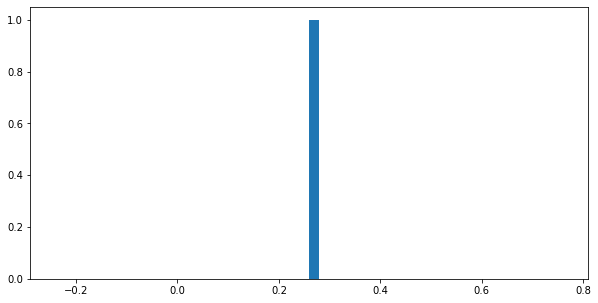

In [30]:
smc_program4(n_particles=1)

## \#particle: 10

Number of samples: 10
Sampling time: 0 seconds
Posterior mean: 2.663
Posterior variance: 0.000
logZ: -21.946
Z: 2.9450219653514105e-10


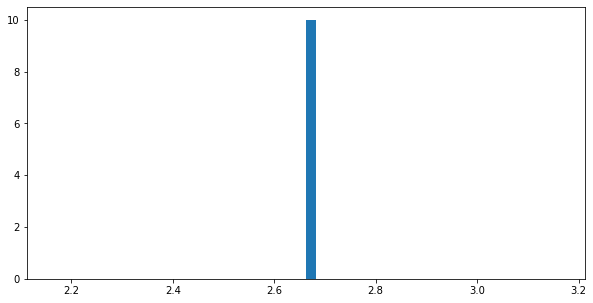

In [31]:
smc_program4(n_particles=10)

## \#particle: 100

Number of samples: 100
Sampling time: 0 seconds
Posterior mean: 6.726
Posterior variance: 0.055
logZ: -8.621
Z: 0.00018032305684500895


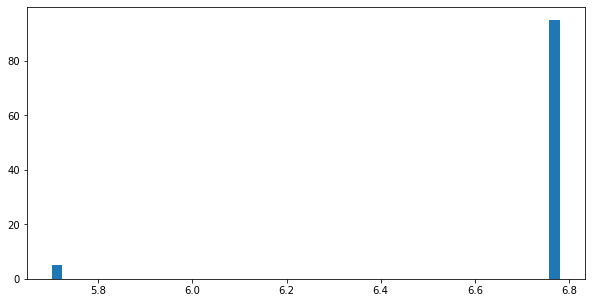

In [32]:
smc_program4(n_particles=100)

## \#particle: 1000

Number of samples: 1000
Sampling time: 0 seconds
Posterior mean: 6.894
Posterior variance: 0.394
logZ: -8.399
Z: 0.0002251663939660064


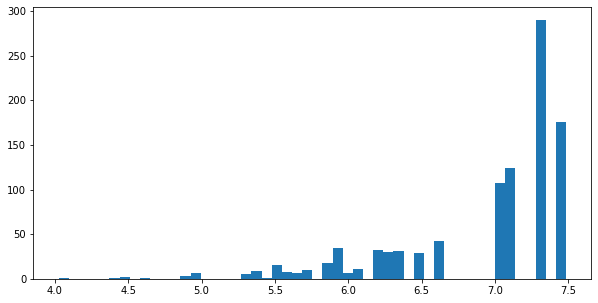

In [33]:
smc_program4(n_particles=1000)

## \#particle: 10000

Number of samples: 10000
Sampling time: 5 seconds
Posterior mean: 7.270
Posterior variance: 0.869
logZ: -8.231
Z: 0.0002662444156486541


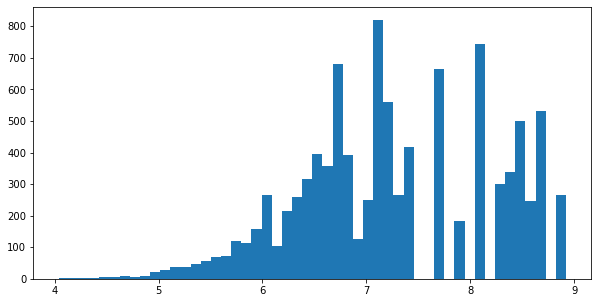

In [34]:
smc_program4(n_particles=int(1e4))

## \#particle: 100000

Number of samples: 100000
Sampling time: 57 seconds
Posterior mean: 7.252
Posterior variance: 0.795
logZ: -8.196
Z: 0.00027565580083405654


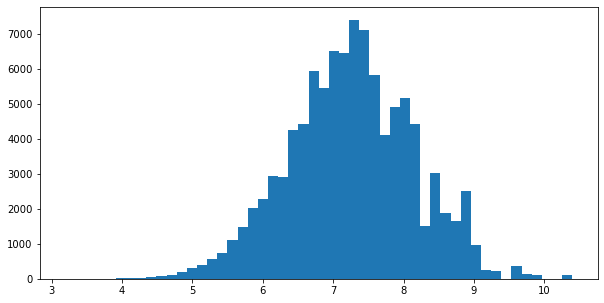

In [35]:
smc_program4(n_particles=int(1e5))